In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

In [2]:
data = pd.read_csv("data_diabetes1.csv")
#data.drop(['id'], axis=1, inplace=True)
df = data.copy()

In [3]:
df.head()

,case1_risk_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,overweight,high_bp,...,creatinine_mg/dL,globulin_g/dL,glucose_mg/dL,potassium_mmol/L,sodium_mmol/L,calcium_mg/dL,triglycerides_mg/dL,uricacid_mg/dL,vigorous_recreational_activities,minutes_sedentary_activity
0,risk_diabet,yes,no,no,no,no,no,yes,yes,yes,...,0.92,2.9,85.0,4.0,141.0,9.2,95.0,5.8,no,300.0
1,not_diabet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,0.81,2.7,94.0,4.4,144.0,9.6,92.0,8.0,no,240.0
2,risk_diabet,yes,no,no,no,no,no,yes,yes,yes,...,0.58,3.2,116.0,4.4,144.0,9.5,72.0,4.5,no,120.0
3,risk_diabet,yes,no,yes,no,no,yes,yes,yes,yes,...,1.32,3.3,96.0,4.1,141.0,9.9,132.0,6.2,no,600.0
4,risk_diabet,no,no,no,no,no,no,no,no,no,...,1.13,3.1,98.0,4.9,140.0,9.4,59.0,4.2,yes,420.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case1_risk_diabet                 5478 non-null   object 
 1   arthritis                         5195 non-null   object 
 2   gout                              5203 non-null   object 
 3   thyroid                           5195 non-null   object 
 4   chronic_bronchitis                5204 non-null   object 
 5   abdominal_pain                    5205 non-null   object 
 6   gallstones                        5197 non-null   object 
 7   diabetic_relative                 5219 non-null   object 
 8   overweight                        5477 non-null   object 
 9   high_bp                           5478 non-null   object 
 10  high_chol                         5472 non-null   object 
 11  pulse_60                          5218 non-null   float64
 12  systol

In [5]:
df.columns

Index(['case1_risk_diabet', 'arthritis', 'gout', 'thyroid',
       'chronic_bronchitis', 'abdominal_pain', 'gallstones',
       'diabetic_relative', 'overweight', 'high_bp', 'high_chol', 'pulse_60',
       'systolic', 'diastolic', 'total_chol_mg/dL', 'bmi', 'arm_circumference',
       'gender', 'race', 'WH_ratio', 'smoked', 'head%_fat', 'larm%_fat',
       'lleg%_fat', 'rarm%_fat', 'rleg%_fat', 'trunk%_fat',
       'total_bone_density', 'total%_fat', 'arm%_fat', 'leg%_fat', 'feritin',
       'iron_ug/dL', 'uibc_ug/dL', 'tibc_ug/dL', 'transferrin', 'alanine_IU/L',
       'albumin_g/dL', 'alkaline_IU/L', 'aspartate_IU/L', 'chloride_mmol/L',
       'creatinine_mg/dL', 'globulin_g/dL', 'glucose_mg/dL',
       'potassium_mmol/L', 'sodium_mmol/L', 'calcium_mg/dL',
       'triglycerides_mg/dL', 'uricacid_mg/dL',
       'vigorous_recreational_activities', 'minutes_sedentary_activity'],
      dtype='object')

Data Biochemistry Profile not include in analysis because objective for screening.

In [6]:
df = df[['case1_risk_diabet', 'arthritis', 'gout', 'thyroid',
       'chronic_bronchitis', 'abdominal_pain', 'gallstones',
       'diabetic_relative', 'overweight', 'high_bp', 'high_chol', 'pulse_60',
       'systolic', 'diastolic', 'total_chol_mg/dL', 'bmi', 'arm_circumference',
       'gender', 'race', 'WH_ratio', 'smoked', 'head%_fat', 'larm%_fat',
       'lleg%_fat', 'rarm%_fat', 'rleg%_fat', 'trunk%_fat',
       'total_bone_density', 'total%_fat', 'arm%_fat', 'leg%_fat', 'feritin',
       'iron_ug/dL', 'uibc_ug/dL', 'tibc_ug/dL', 'transferrin','vigorous_recreational_activities', 
       'minutes_sedentary_activity']]

In [7]:
categorical = df.drop(['case1_risk_diabet',],axis=1).select_dtypes('object')
numerical = df.select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

In [8]:
df.describe(include=['object'])

,case1_risk_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,overweight,high_bp,high_chol,gender,race,smoked,vigorous_recreational_activities
count,5478,5195,5203,5195,5204,5205,5197,5219,5477,5478,5472,5478,5478,5478,5478
unique,2,2,2,2,2,2,2,2,2,2,2,2,6,2,2
top,risk_diabet,no,no,no,no,no,no,yes,yes,no,yes,female,W,no,no
freq,3196,3593,4882,4577,4836,4068,4612,2699,4100,3418,2825,2818,1884,3132,4135


In [9]:
df.describe()

,pulse_60,systolic,diastolic,total_chol_mg/dL,bmi,arm_circumference,WH_ratio,head%_fat,larm%_fat,lleg%_fat,...,total_bone_density,total%_fat,arm%_fat,leg%_fat,feritin,iron_ug/dL,uibc_ug/dL,tibc_ug/dL,transferrin,minutes_sedentary_activity
count,5218.000000,4848.000000,4848.000000,5129.000000,5379.000000,5200.000000,5128.000000,2803.000000,2770.000000,2698.000000,...,2461.000000,2452.000000,2630.000000,2603.000000,5166.000000,5121.000000,5102.000000,5096.000000,5096.000000,5436.000000
mean,71.756612,126.166254,71.804455,186.747709,29.671017,33.314154,0.936437,24.026543,34.669928,35.413862,...,1.116924,33.242577,33.975380,35.369939,157.872365,86.405194,236.921011,323.311813,27.324372,331.856512
std,11.630096,19.729165,13.495849,41.037238,7.444264,5.332637,0.082071,0.643938,11.893305,9.920786,...,0.106266,8.639738,11.538458,9.811994,195.810988,36.364738,64.258333,51.462767,11.725657,200.121171
min,34.000000,72.000000,0.000000,76.000000,14.200000,17.900000,0.660000,21.700000,10.500000,10.700000,...,0.697000,12.100000,11.000000,11.100000,1.040000,11.000000,12.000000,139.000000,2.000000,0.000000
25%,64.000000,112.000000,64.000000,158.000000,24.600000,29.500000,0.880000,23.600000,25.125000,27.500000,...,1.044000,27.100000,24.762500,27.600000,51.000000,62.000000,196.000000,289.000000,19.000000,180.000000
50%,70.000000,124.000000,72.000000,183.000000,28.400000,32.900000,0.940000,24.000000,34.000000,35.900000,...,1.113000,33.100000,33.100000,35.900000,107.000000,82.000000,231.000000,319.000000,26.000000,300.000000
75%,78.000000,136.000000,80.000000,212.000000,33.500000,36.600000,0.992500,24.400000,44.100000,43.500000,...,1.183000,40.300000,43.137500,43.250000,196.000000,105.000000,271.000000,352.000000,34.000000,480.000000
max,136.000000,228.000000,136.000000,446.000000,86.200000,56.300000,1.240000,27.500000,69.200000,61.100000,...,1.728000,56.100000,66.800000,61.850000,5190.000000,481.000000,540.000000,601.000000,92.000000,1320.000000


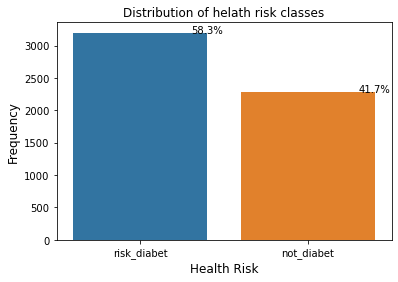

risk_diabet    3196
not_diabet     2282
Name: case1_risk_diabet, dtype: int64

In [10]:
# Class distribution for health_risk 
total = float(len(df['case1_risk_diabet']))
ax=sns.countplot(x='case1_risk_diabet', data=df,)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Distribution of helath risk classes')
plt.xlabel('Health Risk', size=12)
plt.ylabel('Frequency', size=12)
plt.show()
df.case1_risk_diabet.value_counts()

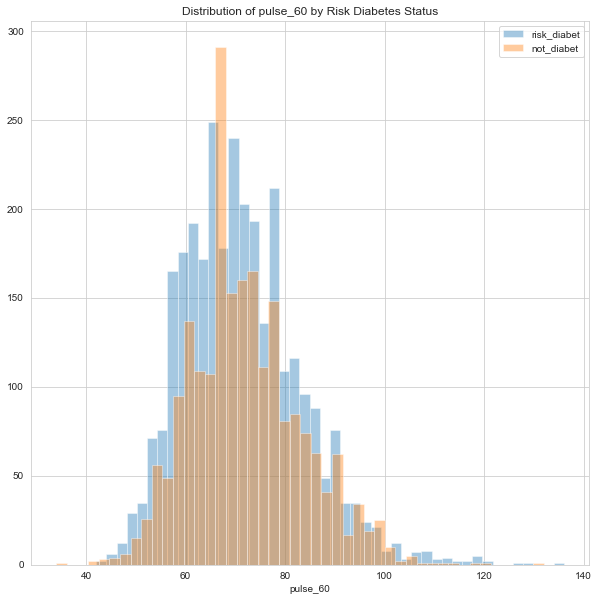

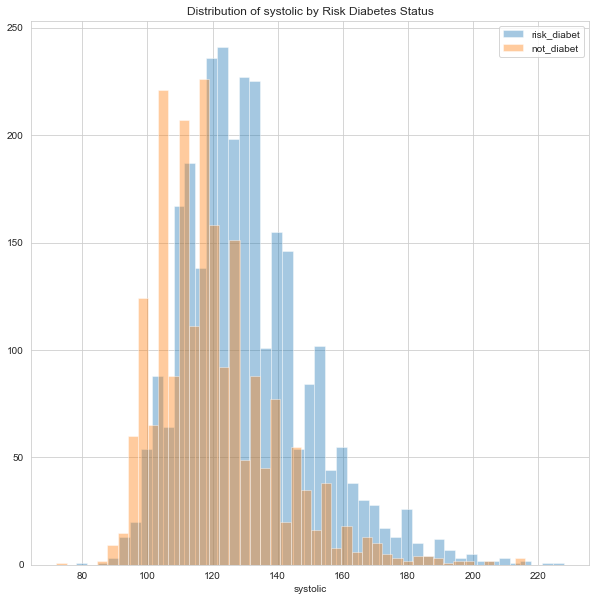

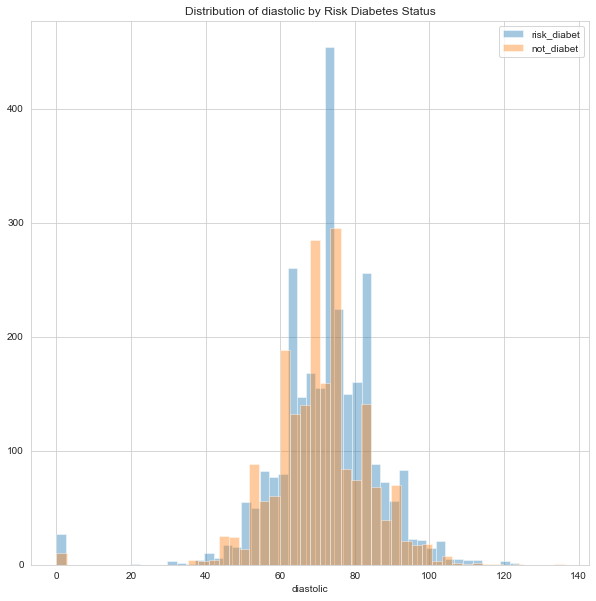

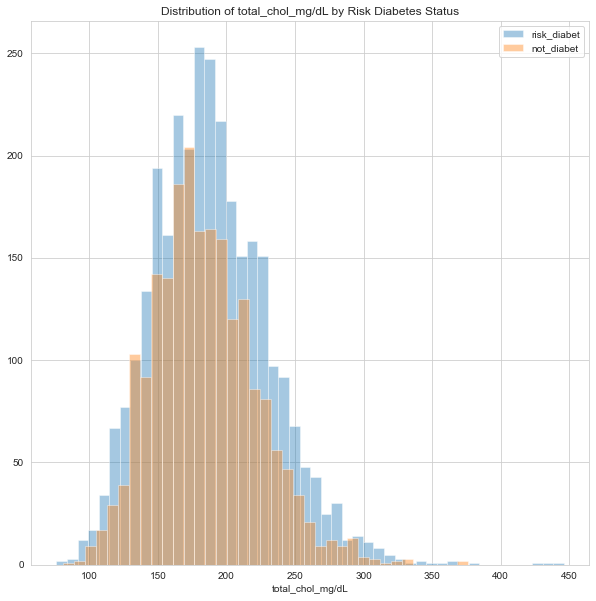

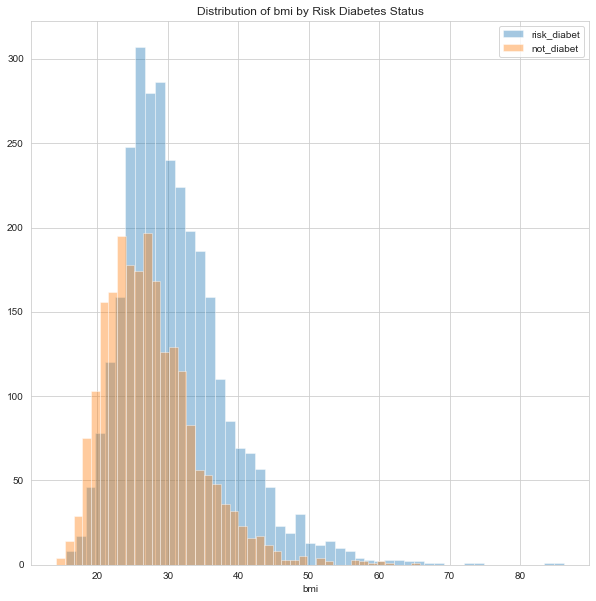

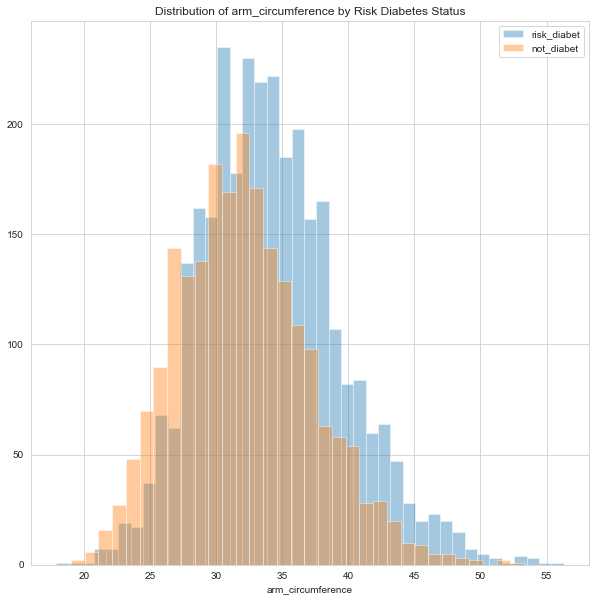

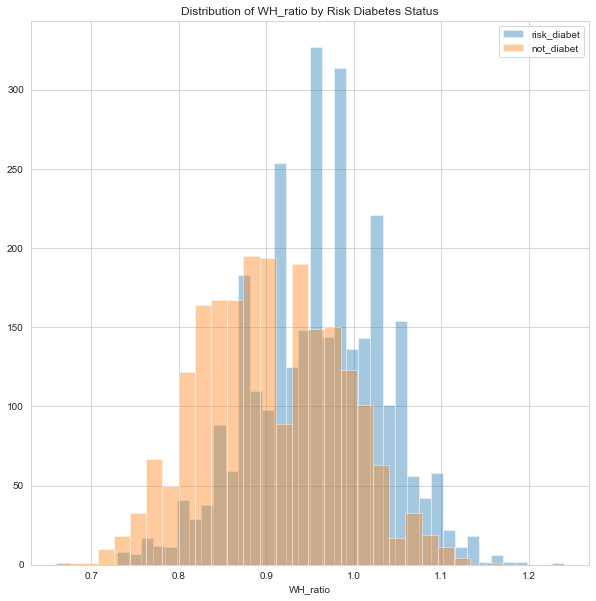

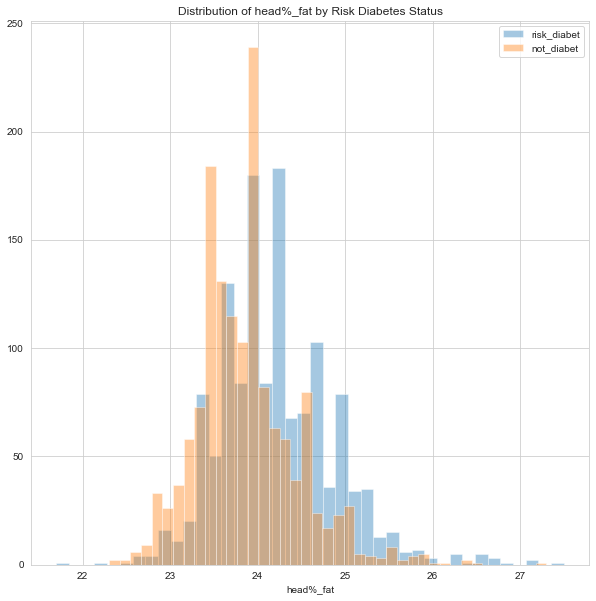

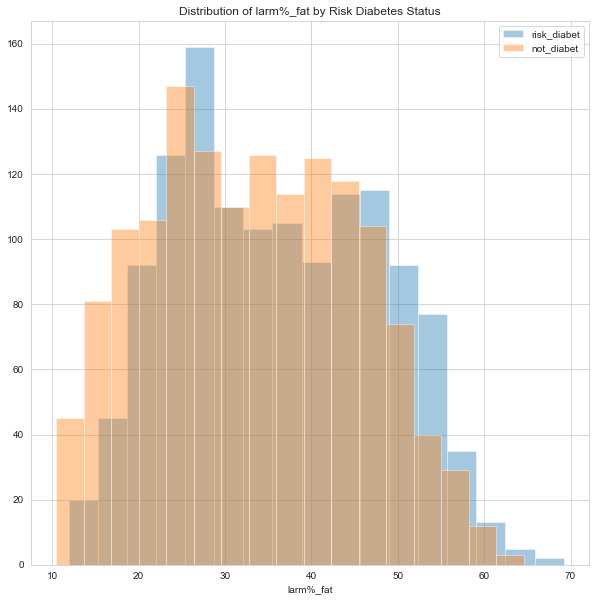

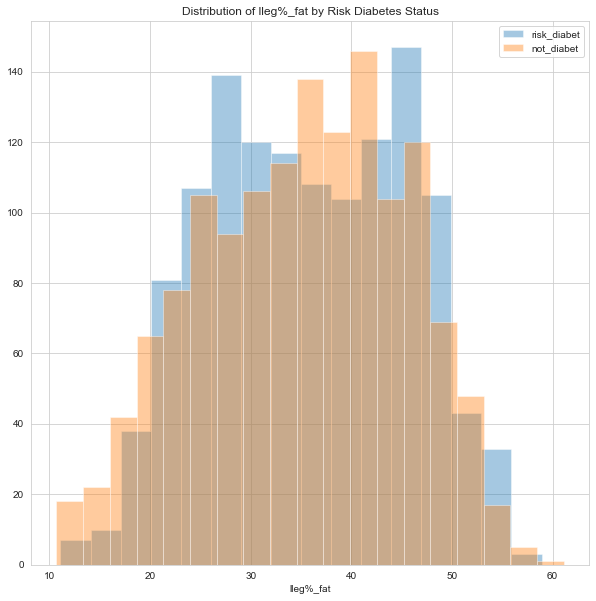

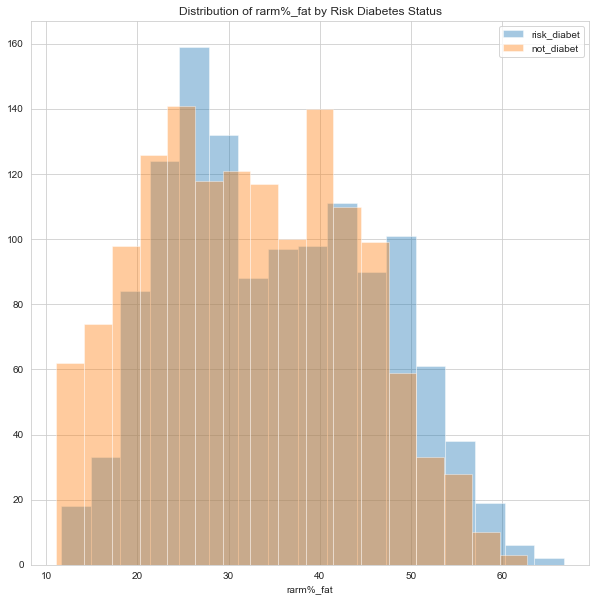

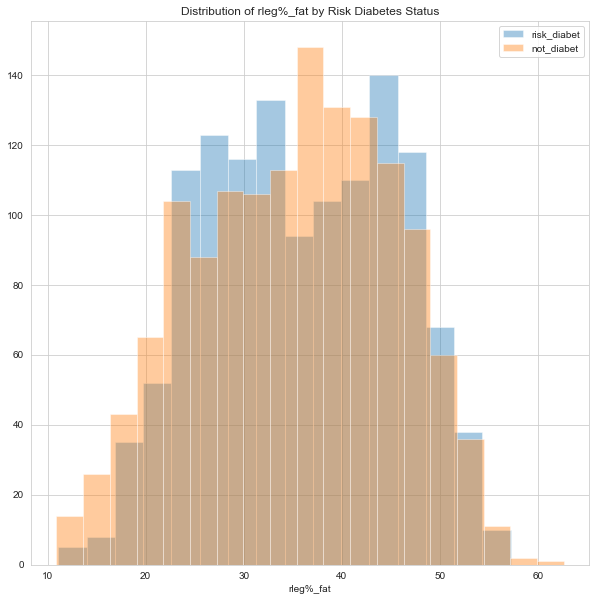

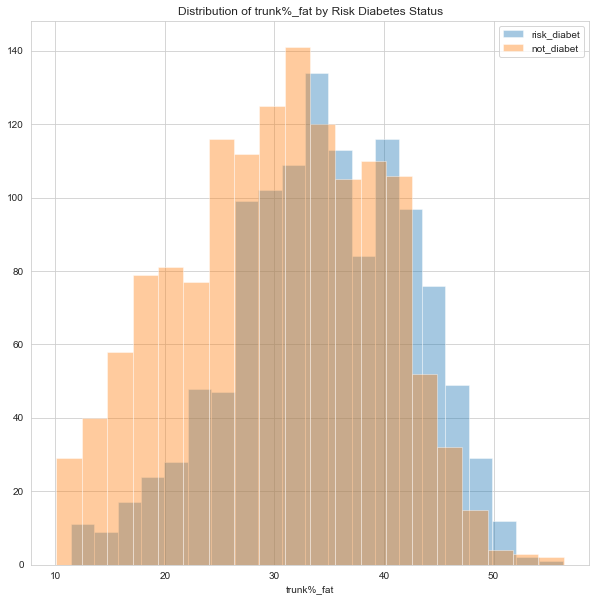

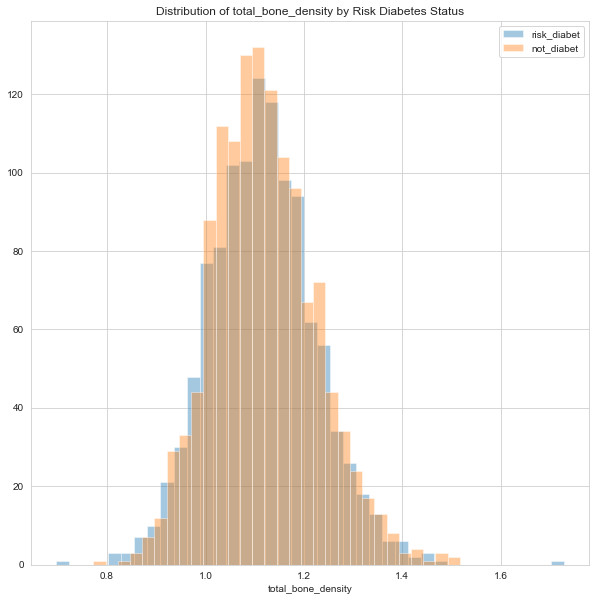

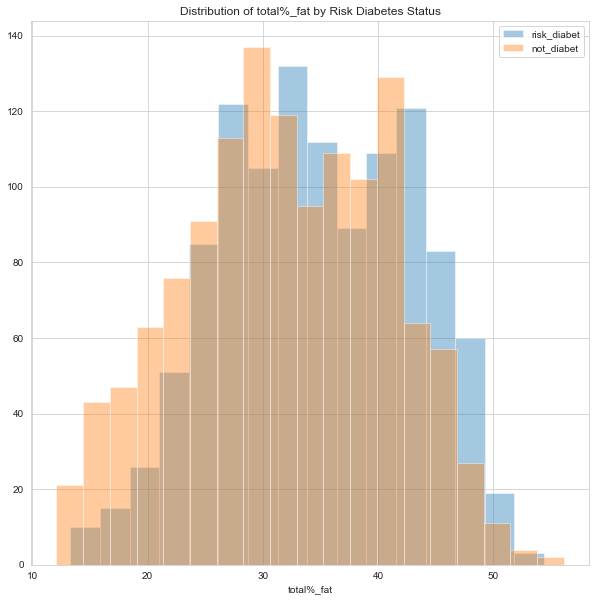

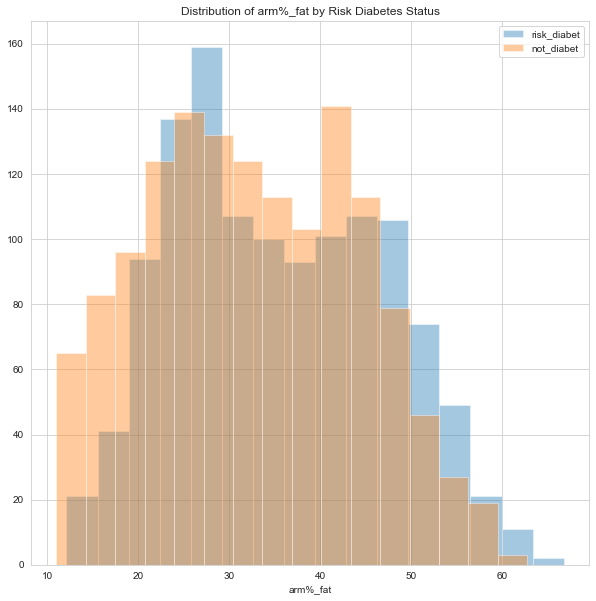

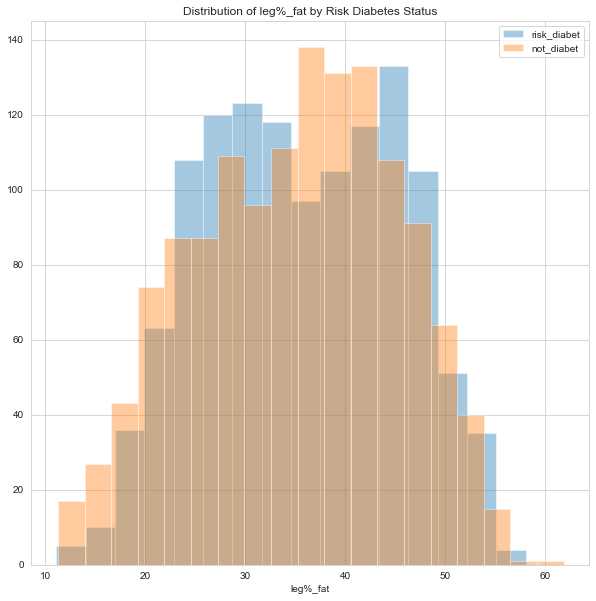

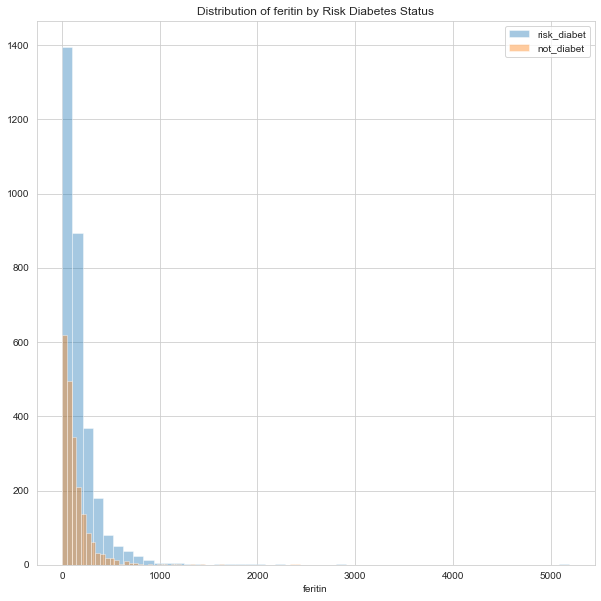

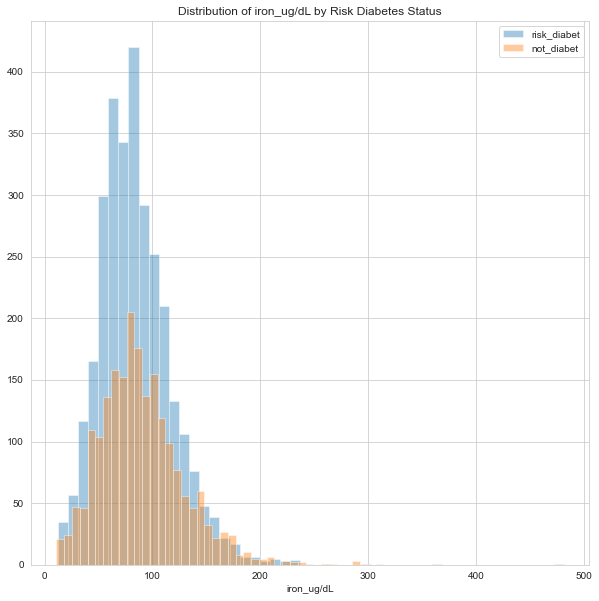

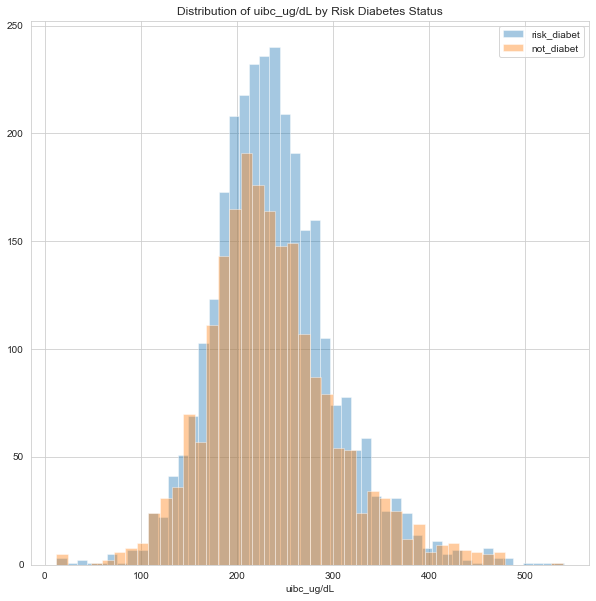

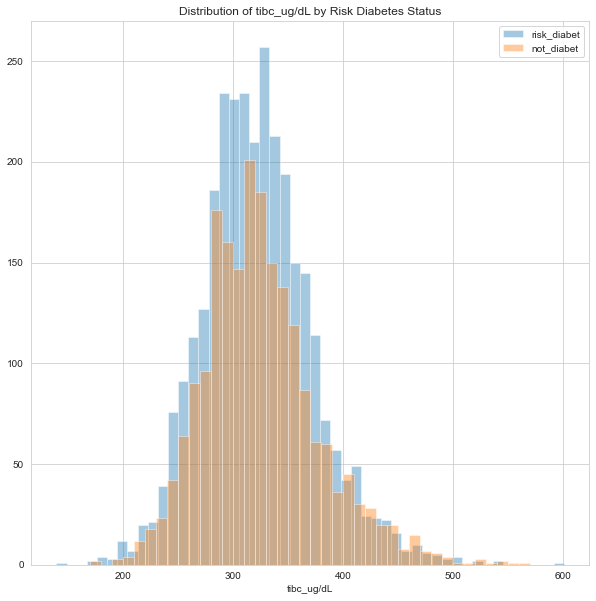

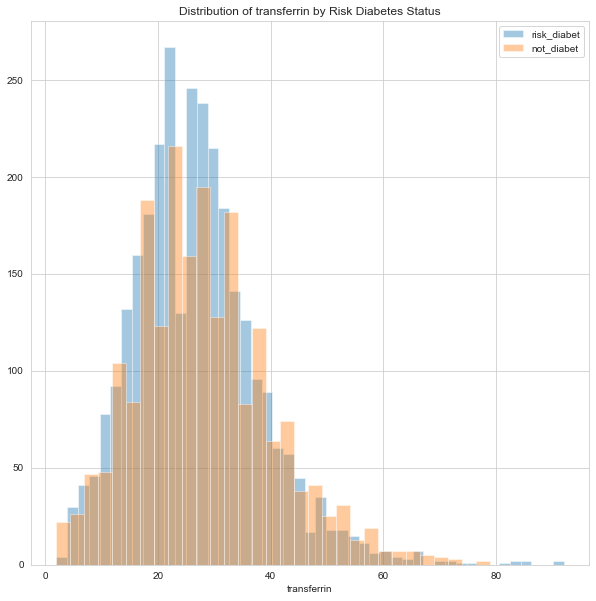

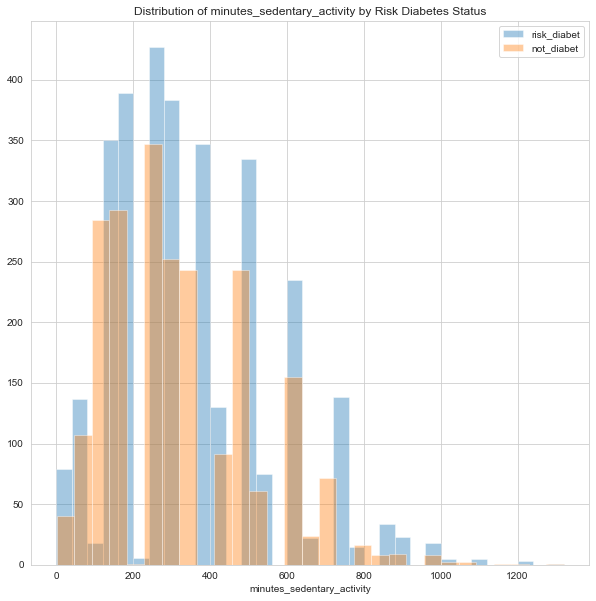

In [11]:
for i in numerical_columns:
    plt.figure(figsize=(10,10))
    sns.set_style('whitegrid')
    sns.distplot(df[df['case1_risk_diabet']=='risk_diabet'][i], kde=False)
    sns.distplot(df[df['case1_risk_diabet']=='not_diabet'][i], kde=False)
    plt.legend(df['case1_risk_diabet'].unique())
    plt.title ('Distribution of {} by Risk Diabetes Status'.format(i))
    plt.show()

In [12]:
categorical_columns

Index(['arthritis', 'gout', 'thyroid', 'chronic_bronchitis', 'abdominal_pain',
       'gallstones', 'diabetic_relative', 'overweight', 'high_bp', 'high_chol',
       'gender', 'race', 'smoked', 'vigorous_recreational_activities'],
      dtype='object')

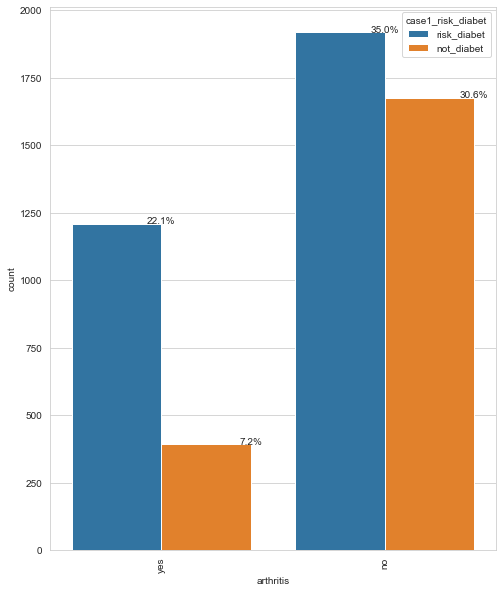

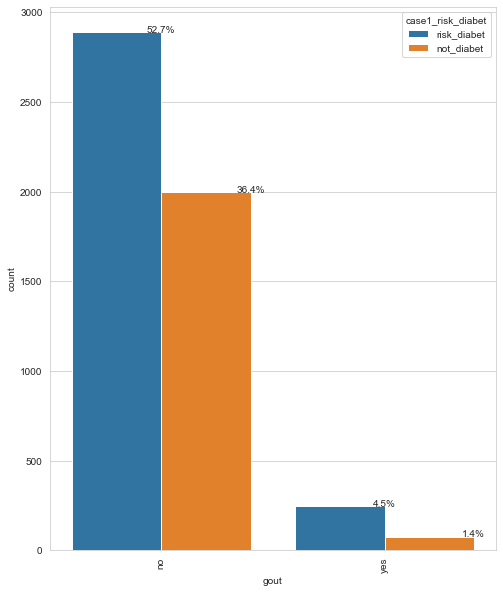

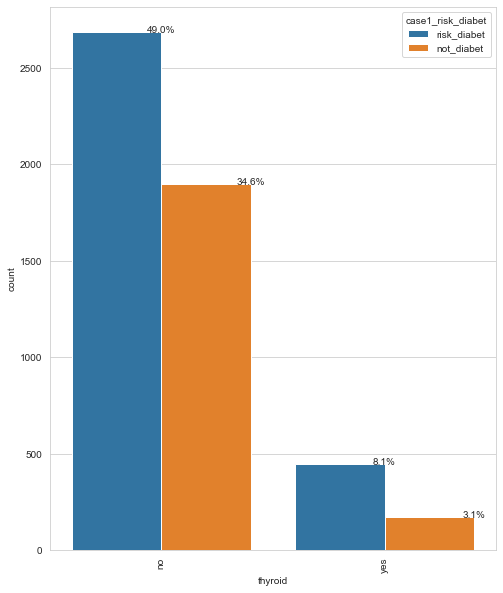

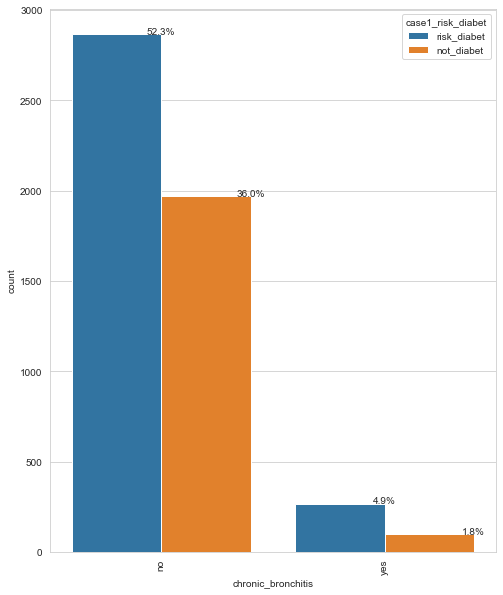

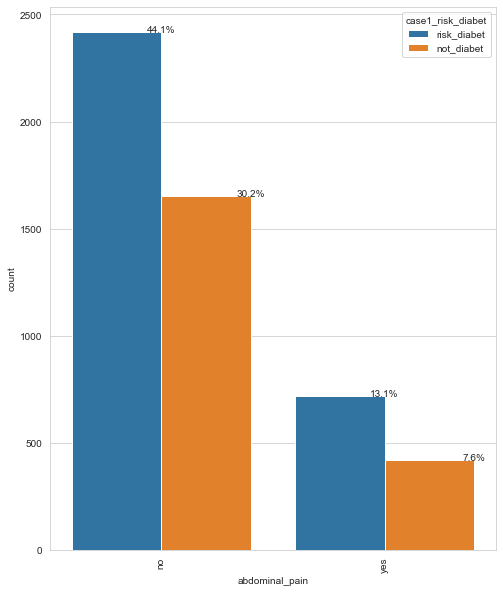

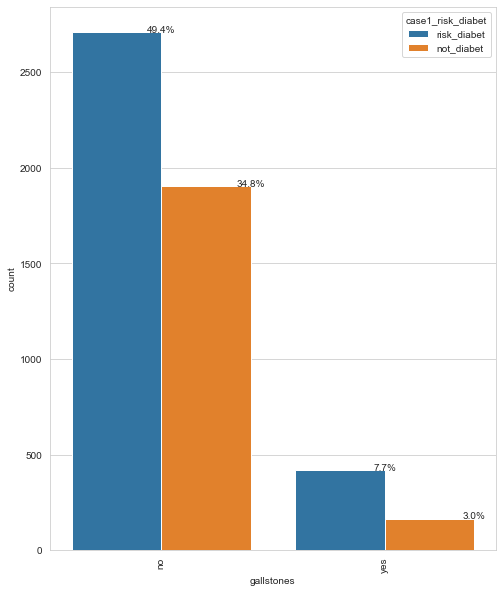

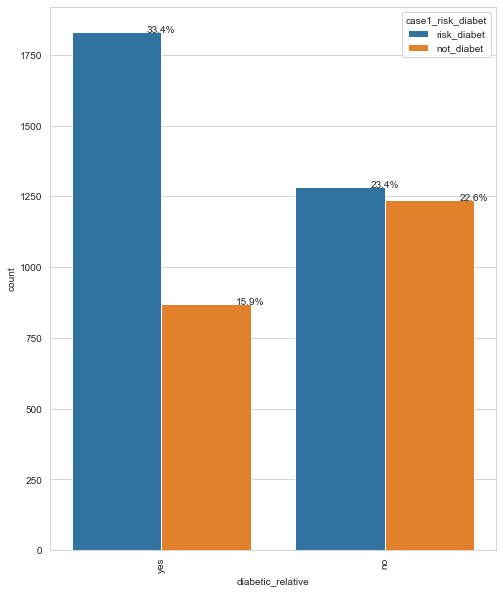

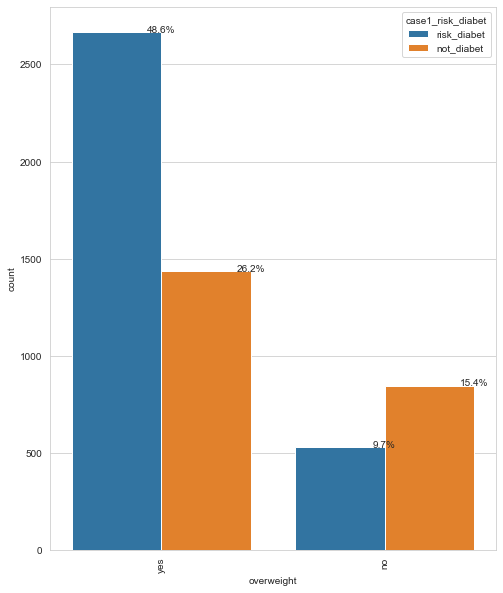

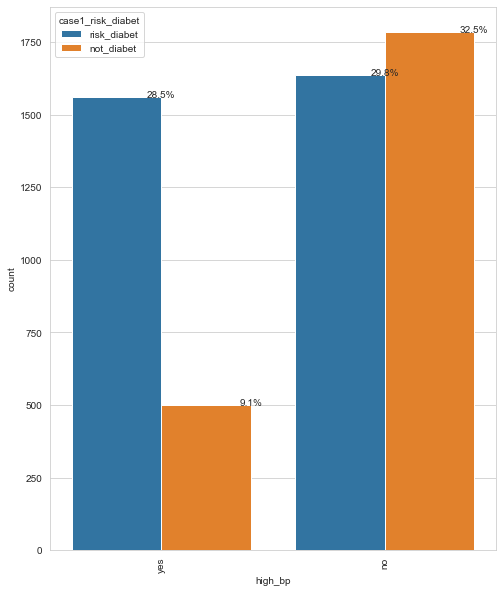

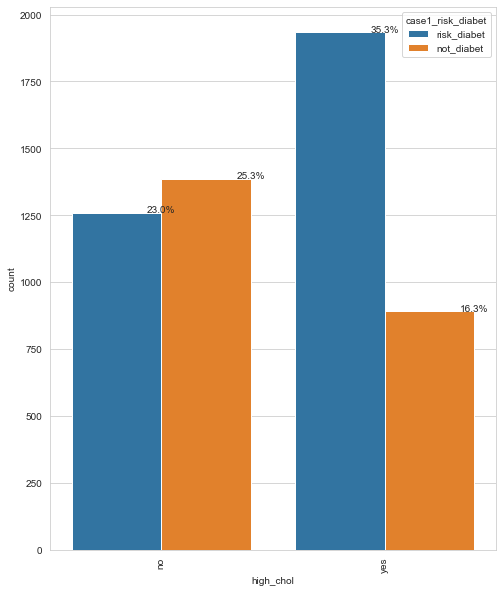

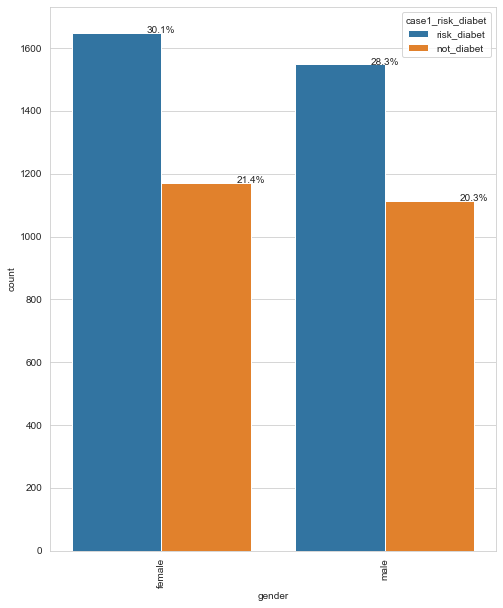

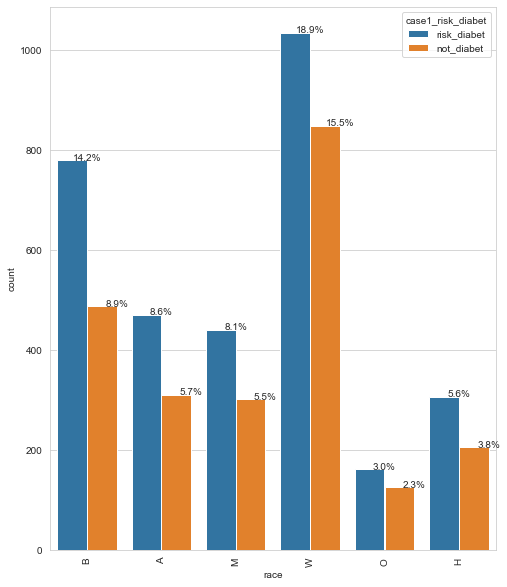

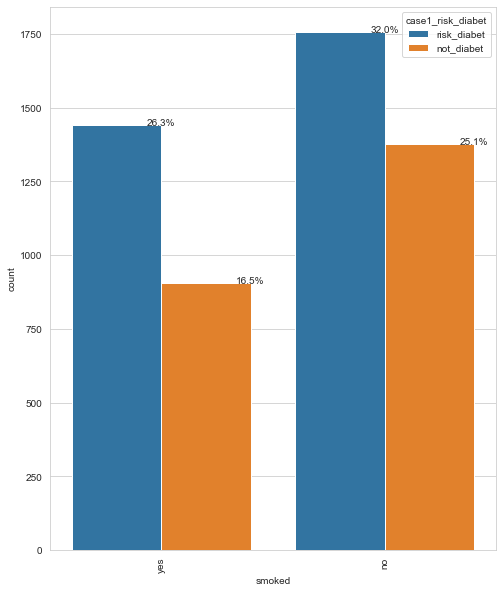

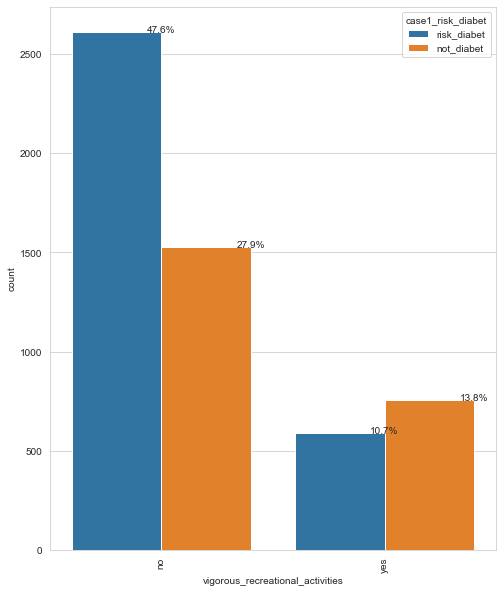

In [13]:
for i in categorical_columns:
    plt.figure(figsize=(8,10))
    sns.set_style('whitegrid')
    ax = sns.countplot(x = i, data=df[['case1_risk_diabet',i]], hue='case1_risk_diabet')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xticks(rotation=90)
    plt.show()

### Feature Selection

#### Iteration-1

,Total missing data,Percentage
total%_fat,3026.0,55.239138
total_bone_density,3017.0,55.074845
leg%_fat,2875.0,52.482658
trunk%_fat,2864.0,52.281855
arm%_fat,2848.0,51.989777
rleg%_fat,2817.0,51.423877
lleg%_fat,2780.0,50.748448
rarm%_fat,2778.0,50.711939
larm%_fat,2708.0,49.434100
head%_fat,2675.0,48.831690


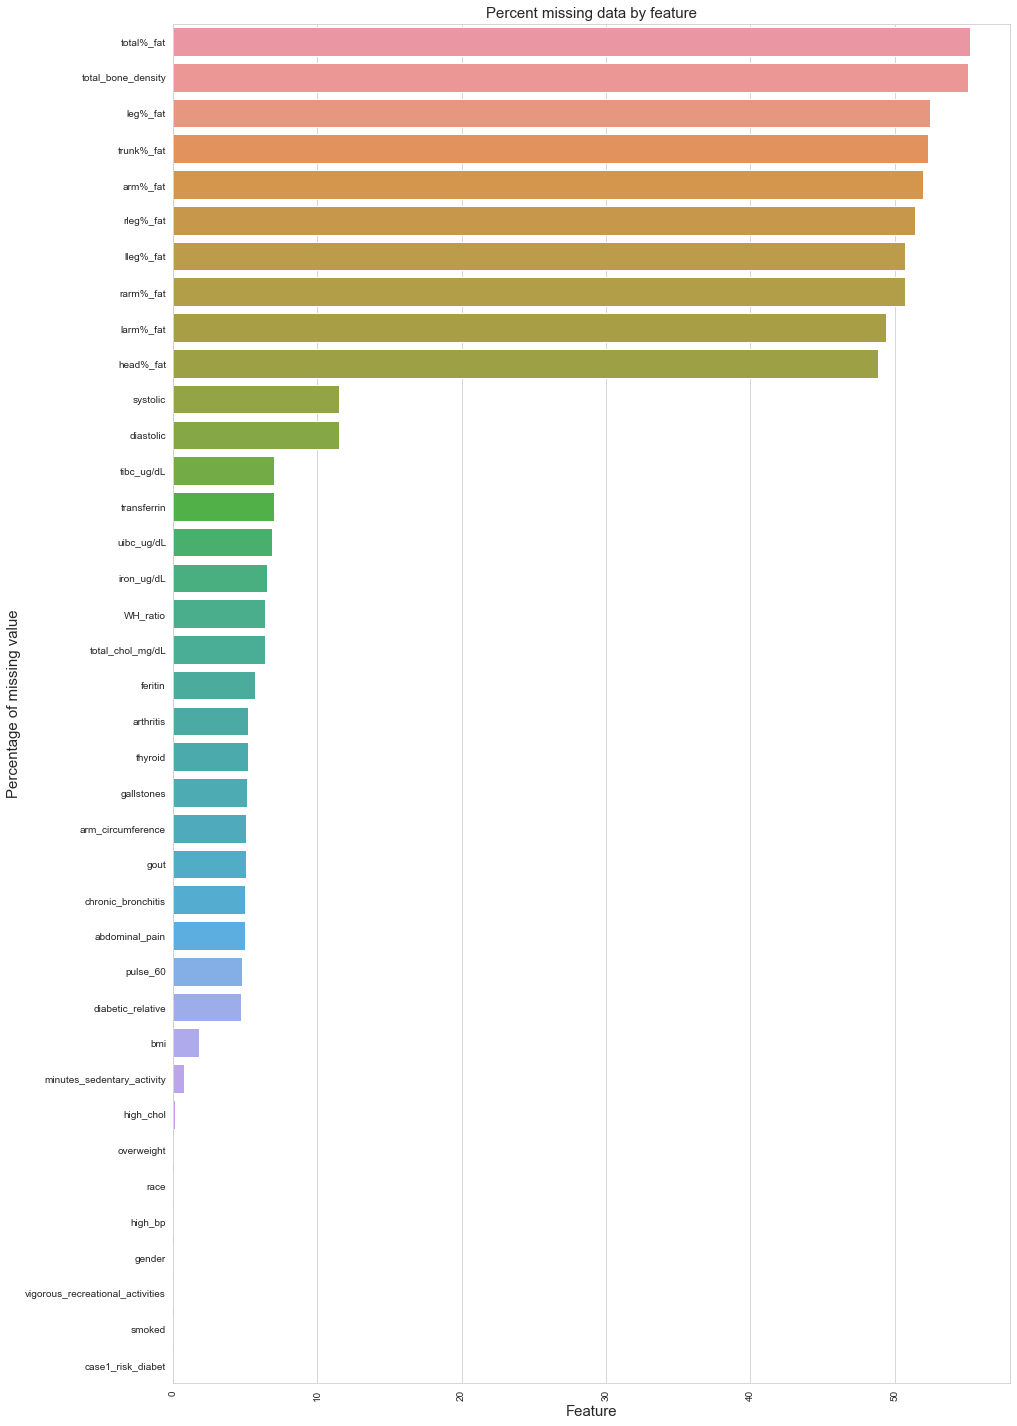

In [14]:
# Total missing data
total = df.isnull().sum().sort_values(ascending=False)

# Percentage missing data
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

# Tabel Missing Data
missing_data = pd.concat([total, percent],axis=1, keys=['Total missing data', 'Percentage'])
tabel_md = missing_data[missing_data > 0].head(50).dropna()

# Graph Missing Data
fig, ax = plt.subplots(figsize=(15,25))
plt.xticks(rotation='90')
sns.barplot(y=missing_data.index, x=missing_data['Percentage'])
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percentage of missing value', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

tabel_md

In [15]:
tabel_md[tabel_md.Percentage > 50].index

Index(['total%_fat', 'total_bone_density', 'leg%_fat', 'trunk%_fat',
       'arm%_fat', 'rleg%_fat', 'lleg%_fat', 'rarm%_fat'],
      dtype='object')

In [16]:
categorical.columns

Index(['arthritis', 'gout', 'thyroid', 'chronic_bronchitis', 'abdominal_pain',
       'gallstones', 'diabetic_relative', 'overweight', 'high_bp', 'high_chol',
       'gender', 'race', 'smoked', 'vigorous_recreational_activities'],
      dtype='object')

In [17]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 4 to 5473
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case1_risk_diabet                 1632 non-null   object 
 1   arthritis                         1632 non-null   object 
 2   gout                              1632 non-null   object 
 3   thyroid                           1632 non-null   object 
 4   chronic_bronchitis                1632 non-null   object 
 5   abdominal_pain                    1632 non-null   object 
 6   gallstones                        1632 non-null   object 
 7   diabetic_relative                 1632 non-null   object 
 8   overweight                        1632 non-null   object 
 9   high_bp                           1632 non-null   object 
 10  high_chol                         1632 non-null   object 
 11  pulse_60                          1632 non-null   float64
 12  systol

In [18]:
df.drop(columns=tabel_md[tabel_md.Percentage > 50].index)

,case1_risk_diabet,arthritis,gout,thyroid,chronic_bronchitis,abdominal_pain,gallstones,diabetic_relative,overweight,high_bp,...,smoked,head%_fat,larm%_fat,feritin,iron_ug/dL,uibc_ug/dL,tibc_ug/dL,transferrin,vigorous_recreational_activities,minutes_sedentary_activity
0,risk_diabet,yes,no,no,no,no,no,yes,yes,yes,...,yes,NaN,NaN,28.70,92.0,233.0,325.0,28.0,no,300.0
1,not_diabet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,...,no,24.4,26.0,284.00,164.0,155.0,319.0,51.0,no,240.0
2,risk_diabet,yes,no,no,no,no,no,yes,yes,yes,...,no,NaN,NaN,109.00,90.0,195.0,285.0,32.0,no,120.0
3,risk_diabet,yes,no,yes,no,no,yes,yes,yes,yes,...,yes,NaN,NaN,129.00,63.0,239.0,302.0,21.0,no,600.0
4,risk_diabet,no,no,no,no,no,no,no,no,no,...,no,23.5,18.5,40.60,56.0,287.0,343.0,16.0,yes,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,risk_diabet,no,no,no,no,no,no,no,no,no,...,yes,23.9,13.8,219.00,94.0,219.0,313.0,30.0,no,60.0
5474,risk_diabet,no,no,no,no,no,no,no,no,no,...,no,NaN,NaN,135.00,135.0,213.0,348.0,39.0,no,120.0
5475,risk_diabet,no,no,no,no,no,no,no,yes,no,...,yes,NaN,NaN,120.00,70.0,276.0,346.0,20.0,no,360.0
5476,not_diabet,no,no,no,no,no,no,yes,yes,no,...,no,22.9,33.7,1.99,21.0,441.0,462.0,5.0,no,600.0


#### CRAMERS V ( CATEGORICAL VS CATEGORICAL)

In [19]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [20]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df[i], df['case1_risk_diabet']))
CramersV= pd.DataFrame(data=[categorical_columns, cramers]).T
CramersV.columns= ['Column', 'CramersV']
CramersV.sort_values(by='CramersV', ascending=False)
CramersV

,Column,CramersV
0,arthritis,0.207754
1,gout,0.0840809
2,thyroid,0.0880765
3,chronic_bronchitis,0.0689978
4,abdominal_pain,0.0280114
5,gallstones,0.0826736
6,diabetic_relative,0.17071
7,overweight,0.23163
8,high_bp,0.273853
9,high_chol,0.210307


In [21]:
CramersV[CramersV.CramersV < 0.1].values[:,0]

array(['gout', 'thyroid', 'chronic_bronchitis', 'abdominal_pain',
       'gallstones', 'gender', 'race', 'smoked'], dtype=object)

#### Delete columns cramersV < 0.1

In [22]:
df.drop(columns=CramersV[CramersV.CramersV < 0.1].values[:,0], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [23]:
df.columns

Index(['case1_risk_diabet', 'arthritis', 'diabetic_relative', 'overweight',
       'high_bp', 'high_chol', 'pulse_60', 'systolic', 'diastolic',
       'total_chol_mg/dL', 'bmi', 'arm_circumference', 'WH_ratio', 'head%_fat',
       'larm%_fat', 'lleg%_fat', 'rarm%_fat', 'rleg%_fat', 'trunk%_fat',
       'total_bone_density', 'total%_fat', 'arm%_fat', 'leg%_fat', 'feritin',
       'iron_ug/dL', 'uibc_ug/dL', 'tibc_ug/dL', 'transferrin',
       'vigorous_recreational_activities', 'minutes_sedentary_activity'],
      dtype='object')

#### CORRELATION RATIO ( NUMERICAL VS CATEGORICAL)

In [24]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

In [25]:
corr_ratio = []
for i in numerical_columns:
    corr_ratio.append(correlation_ratio(df['case1_risk_diabet'], df[i]))
    
Corr = pd.DataFrame(data=[numerical_columns, corr_ratio]
                   ).T
Corr.columns = ['Column', 'Corr_Ratio']
Corr.sort_values(by='Corr_Ratio', ascending=False)

,Column,Corr_Ratio
6,WH_ratio,0.352253
4,bmi,0.282748
7,head%_fat,0.273878
5,arm_circumference,0.256193
1,systolic,0.230621
12,trunk%_fat,0.217309
2,diastolic,0.170492
17,feritin,0.147005
3,total_chol_mg/dL,0.14576
14,total%_fat,0.119453


In [26]:
Corr[Corr.Corr_Ratio < 0.15].iloc[:,0].values

array(['pulse_60', 'total_chol_mg/dL', 'larm%_fat', 'lleg%_fat',
       'rarm%_fat', 'rleg%_fat', 'total_bone_density', 'total%_fat',
       'arm%_fat', 'leg%_fat', 'feritin', 'iron_ug/dL', 'uibc_ug/dL',
       'tibc_ug/dL', 'transferrin', 'minutes_sedentary_activity'],
      dtype=object)

#### Delete columns Corr_ratio < 0.15 & diastolic

In [27]:
df.drop(columns=Corr[Corr.Corr_Ratio < 0.15].iloc[:,0].values, axis=1, inplace=True)

In [28]:
df.drop(columns=['diastolic'], axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case1_risk_diabet                 1635 non-null   object 
 1   arthritis                         1635 non-null   object 
 2   diabetic_relative                 1635 non-null   object 
 3   overweight                        1635 non-null   object 
 4   high_bp                           1635 non-null   object 
 5   high_chol                         1635 non-null   object 
 6   systolic                          1635 non-null   float64
 7   bmi                               1635 non-null   float64
 8   arm_circumference                 1635 non-null   float64
 9   WH_ratio                          1635 non-null   float64
 10  head%_fat                         1635 non-null   float64
 11  trunk%_fat                        1635 non-null   float64
 12  vigoro

#### Iteration-2

In [30]:
df.columns.values

array(['case1_risk_diabet', 'arthritis', 'diabetic_relative',
       'overweight', 'high_bp', 'high_chol', 'systolic', 'bmi',
       'arm_circumference', 'WH_ratio', 'head%_fat', 'trunk%_fat',
       'vigorous_recreational_activities'], dtype=object)

In [31]:
df = data[df.columns.values]

,Total missing data,Percentage
trunk%_fat,2864.0,52.281855
head%_fat,2675.0,48.831690
systolic,630.0,11.500548
WH_ratio,350.0,6.389193
arthritis,283.0,5.166119
arm_circumference,278.0,5.074845
diabetic_relative,259.0,4.728003
bmi,99.0,1.807229
high_chol,6.0,0.109529
overweight,1.0,0.018255


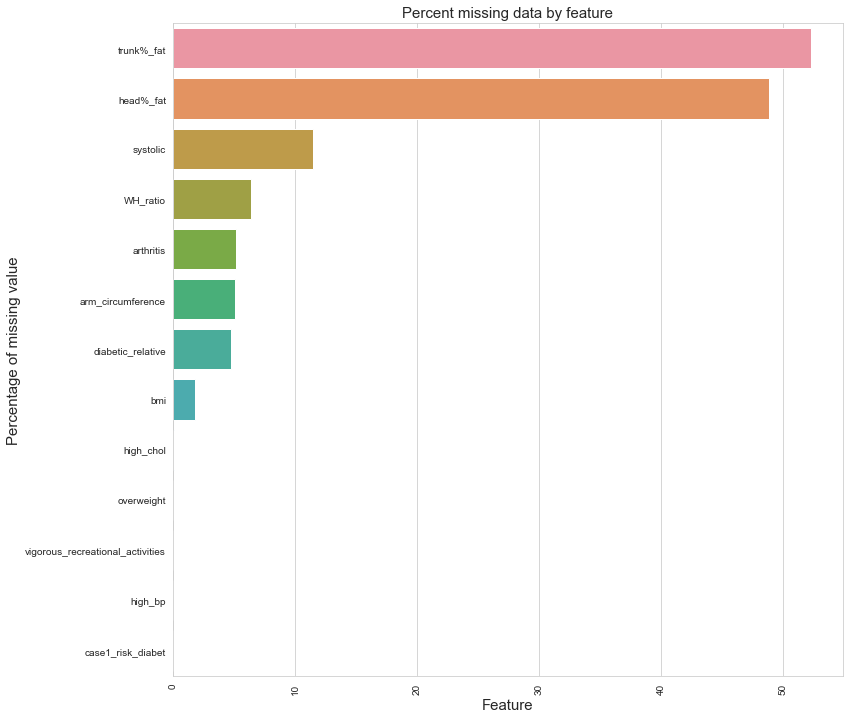

In [32]:
# Total missing data
total = df.isnull().sum().sort_values(ascending=False)

# Percentage missing data
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

# Tabel Missing Data
missing_data = pd.concat([total, percent],axis=1, keys=['Total missing data', 'Percentage'])
tabel_md = missing_data[missing_data > 0].head(50).dropna()

# Graph Missing Data
fig, ax = plt.subplots(figsize=(12,12))
plt.xticks(rotation='90')
sns.barplot(y=missing_data.index, x=missing_data['Percentage'])
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percentage of missing value', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

tabel_md

#### Delete columns missing_value > 50%

In [33]:
df.drop(columns=['trunk%_fat', 'head%_fat'], axis=1, inplace=True)
df.dropna()

,case1_risk_diabet,arthritis,diabetic_relative,overweight,high_bp,high_chol,systolic,bmi,arm_circumference,WH_ratio,vigorous_recreational_activities
3,risk_diabet,yes,yes,yes,yes,no,120.0,38.9,38.1,0.86,no
4,risk_diabet,no,no,no,no,yes,108.0,21.3,30.8,0.95,yes
6,not_diabet,yes,no,no,no,no,104.0,23.5,30.6,1.10,no
8,risk_diabet,yes,yes,no,no,yes,112.0,22.5,30.8,0.96,yes
9,not_diabet,yes,no,yes,no,yes,120.0,30.7,34.2,1.00,yes
...,...,...,...,...,...,...,...,...,...,...,...
5473,risk_diabet,no,no,no,no,yes,120.0,23.7,32.9,0.87,no
5474,risk_diabet,no,no,no,no,no,136.0,20.0,25.1,0.94,no
5475,risk_diabet,no,no,yes,no,yes,124.0,35.8,40.6,1.02,no
5476,not_diabet,no,yes,yes,no,no,116.0,26.1,26.8,0.84,no


In [34]:
#df.dropna(inplace=True)
#df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case1_risk_diabet                 5478 non-null   object 
 1   arthritis                         5195 non-null   object 
 2   diabetic_relative                 5219 non-null   object 
 3   overweight                        5477 non-null   object 
 4   high_bp                           5478 non-null   object 
 5   high_chol                         5472 non-null   object 
 6   systolic                          4848 non-null   float64
 7   bmi                               5379 non-null   float64
 8   arm_circumference                 5200 non-null   float64
 9   WH_ratio                          5128 non-null   float64
 10  vigorous_recreational_activities  5478 non-null   object 
dtypes: float64(4), object(7)
memory usage: 470.9+ KB


In [35]:
categorical = df.drop(['case1_risk_diabet',],axis=1).select_dtypes('object')
numerical = df.select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

#### CRAMERS V ( CATEGORICAL VS CATEGORICAL)

In [36]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df[i], df['case1_risk_diabet']))
CramersV= pd.DataFrame(data=[categorical_columns, cramers]).T
CramersV.columns= ['Column', 'CramersV']
CramersV.sort_values(by='CramersV', ascending=False)
CramersV

,Column,CramersV
0,arthritis,0.207754
1,diabetic_relative,0.17071
2,overweight,0.23163
3,high_bp,0.273853
4,high_chol,0.210307
5,vigorous_recreational_activities,0.167354


In [37]:
CramersV[CramersV.CramersV < 0.17].values[:,0]

array(['vigorous_recreational_activities'], dtype=object)

#### Delete columns cramersV < 0.17

In [38]:
df.drop(columns=CramersV[CramersV.CramersV < 0.17].values[:,0], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

#### CORRELATION RATIO ( NUMERICAL VS CATEGORICAL)

In [39]:
corr_ratio = []
for i in numerical_columns:
    corr_ratio.append(correlation_ratio(df['case1_risk_diabet'], df[i]))
    
Corr = pd.DataFrame(data=[numerical_columns, corr_ratio]
                   ).T
Corr.columns = ['Column', 'Corr_Ratio']
Corr.sort_values(by='Corr_Ratio', ascending=False)

,Column,Corr_Ratio
3,WH_ratio,0.315816
1,bmi,0.228512
0,systolic,0.221649
2,arm_circumference,0.18509


#### Iteration3

In [40]:
df = data[df.columns.values]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case1_risk_diabet  5478 non-null   object 
 1   arthritis          5195 non-null   object 
 2   diabetic_relative  5219 non-null   object 
 3   overweight         5477 non-null   object 
 4   high_bp            5478 non-null   object 
 5   high_chol          5472 non-null   object 
 6   systolic           4848 non-null   float64
 7   bmi                5379 non-null   float64
 8   arm_circumference  5200 non-null   float64
 9   WH_ratio           5128 non-null   float64
dtypes: float64(4), object(6)
memory usage: 428.1+ KB


In [41]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case1_risk_diabet  4318 non-null   object 
 1   arthritis          4318 non-null   object 
 2   diabetic_relative  4318 non-null   object 
 3   overweight         4318 non-null   object 
 4   high_bp            4318 non-null   object 
 5   high_chol          4318 non-null   object 
 6   systolic           4318 non-null   float64
 7   bmi                4318 non-null   float64
 8   arm_circumference  4318 non-null   float64
 9   WH_ratio           4318 non-null   float64
dtypes: float64(4), object(6)
memory usage: 337.5+ KB


In [42]:
categorical = df.drop(['case1_risk_diabet',],axis=1).select_dtypes('object')
numerical = df.select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

Hypothesis Testing : 
- H0 : There is no association between feature and risk diabetes.
- H1 : There is an association between feature and risk diabetes.

Significance level : 5%

#### Check Categorical Column using Chi Squared

In [43]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical:
    if chi2_contingency(
            pd.crosstab(df['case1_risk_diabet'],
                        df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data=[categorical_columns, chi2_check]
                   ).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,arthritis,Reject Null Hypothesis
1,diabetic_relative,Reject Null Hypothesis
2,overweight,Reject Null Hypothesis
3,high_bp,Reject Null Hypothesis
4,high_chol,Reject Null Hypothesis


#### Check Dummies in Categorical Column which Reject Null Hypothesis by using Chi Squared

In [44]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Columns']:
    dummies = pd.get_dummies(df[i])
    bon_p_value = 0.0005/df[i].nunique() 
#     changing the critical value depend on the nuniqueu value in each features
    for series in dummies:
        if chi2_contingency(pd.crosstab(df['case1_risk_diabet'], dummies[series]))[1] < bon_p_value:
            check['{}+{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
            
res_chi = pd.DataFrame(data = [list(check.keys()), list(check.values())]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

,Pair,Hypothesis
0,arthritis+no,Reject Null Hypothesis
1,arthritis+yes,Reject Null Hypothesis
2,diabetic_relative+no,Reject Null Hypothesis
3,diabetic_relative+yes,Reject Null Hypothesis
4,overweight+no,Reject Null Hypothesis
5,overweight+yes,Reject Null Hypothesis
6,high_bp+no,Reject Null Hypothesis
7,high_bp+yes,Reject Null Hypothesis
8,high_chol+no,Reject Null Hypothesis
9,high_chol+yes,Reject Null Hypothesis


In [45]:
res_chi[res_chi['Hypothesis'] != 'Reject Null Hypothesis']

,Pair,Hypothesis


Hypothesis Testing : 
- H0 : Two samples come from the same population (same median).
- H1 : Two samples not come from the same population/ sample tend to be larger than observations in the other

Significance level : 5%

#### Check Numerical Column using Mannwhitney U

In [46]:
from scipy.stats import mannwhitneyu
mann = []
for i in numerical_columns:
    if mannwhitneyu(df[df['case1_risk_diabet'] == 'risk_diabet'][i],
                    df[df['case1_risk_diabet'] == 'not_diabet'][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res_mann = pd.DataFrame(
    data=[list(numerical_columns), mann]).T
res_mann.columns = ['Columns', 'Hypothesis']
res_mann

,Columns,Hypothesis
0,systolic,Reject Null Hypothesis
1,bmi,Reject Null Hypothesis
2,arm_circumference,Reject Null Hypothesis
3,WH_ratio,Reject Null Hypothesis


In [47]:
df

,case1_risk_diabet,arthritis,diabetic_relative,overweight,high_bp,high_chol,systolic,bmi,arm_circumference,WH_ratio
0,risk_diabet,yes,yes,yes,yes,no,120.0,38.9,38.1,0.86
1,risk_diabet,no,no,no,no,yes,108.0,21.3,30.8,0.95
2,not_diabet,yes,no,no,no,no,104.0,23.5,30.6,1.10
3,risk_diabet,yes,yes,no,no,yes,112.0,22.5,30.8,0.96
4,not_diabet,yes,no,yes,no,yes,120.0,30.7,34.2,1.00
...,...,...,...,...,...,...,...,...,...,...
4313,risk_diabet,no,no,no,no,yes,120.0,23.7,32.9,0.87
4314,risk_diabet,no,no,no,no,no,136.0,20.0,25.1,0.94
4315,risk_diabet,no,no,yes,no,yes,124.0,35.8,40.6,1.02
4316,not_diabet,no,yes,yes,no,no,116.0,26.1,26.8,0.84


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case1_risk_diabet  4318 non-null   object 
 1   arthritis          4318 non-null   object 
 2   diabetic_relative  4318 non-null   object 
 3   overweight         4318 non-null   object 
 4   high_bp            4318 non-null   object 
 5   high_chol          4318 non-null   object 
 6   systolic           4318 non-null   float64
 7   bmi                4318 non-null   float64
 8   arm_circumference  4318 non-null   float64
 9   WH_ratio           4318 non-null   float64
dtypes: float64(4), object(6)
memory usage: 337.5+ KB


#### Setting traget and features

In [49]:
random_state=101

In [50]:
df['case1_risk_diabet'].replace({'not_diabet':0,'risk_diabet':1},inplace=True)
df.case1_risk_diabet.value_counts()

1    2568
0    1750
Name: case1_risk_diabet, dtype: int64

In [51]:
target = df['case1_risk_diabet']
features = df.drop(['case1_risk_diabet'], axis=1)

In [52]:
numerical =  df.drop(['case1_risk_diabet'],axis=1).select_dtypes('number')
categorical = df.select_dtypes('object')

In [53]:
categorical.columns

Index(['arthritis', 'diabetic_relative', 'overweight', 'high_bp', 'high_chol'], dtype='object')

In [54]:
categorical.columns.values

array(['arthritis', 'diabetic_relative', 'overweight', 'high_bp',
       'high_chol'], dtype=object)

In [55]:
features = pd.get_dummies(data=features, columns=categorical.columns.values, drop_first=True)

In [56]:
features

,systolic,bmi,arm_circumference,WH_ratio,arthritis_yes,diabetic_relative_yes,overweight_yes,high_bp_yes,high_chol_yes
0,120.0,38.9,38.1,0.86,1,1,1,1,0
1,108.0,21.3,30.8,0.95,0,0,0,0,1
2,104.0,23.5,30.6,1.10,1,0,0,0,0
3,112.0,22.5,30.8,0.96,1,1,0,0,1
4,120.0,30.7,34.2,1.00,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
4313,120.0,23.7,32.9,0.87,0,0,0,0,1
4314,136.0,20.0,25.1,0.94,0,0,0,0,0
4315,124.0,35.8,40.6,1.02,0,0,1,0,1
4316,116.0,26.1,26.8,0.84,0,1,1,0,0


In [57]:
features.columns

Index(['systolic', 'bmi', 'arm_circumference', 'WH_ratio', 'arthritis_yes',
       'diabetic_relative_yes', 'overweight_yes', 'high_bp_yes',
       'high_chol_yes'],
      dtype='object')

In [58]:
### Default Parameter
from sklearn.model_selection import train_test_split
#### split data
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    random_state=random_state, stratify=target)

In [59]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

3238 1080 3238 1080


#### Modelling

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score
from sklearn.metrics import roc_auc_score,roc_curve

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear",random_state=random_state)
log_model = log.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[243 195]
 [118 524]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.55      0.61       438
           1       0.73      0.82      0.77       642

    accuracy                           0.71      1080
   macro avg       0.70      0.69      0.69      1080
weighted avg       0.71      0.71      0.70      1080



In [62]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear",random_state=random_state).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))


[[232 206]
 [100 542]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.53      0.60       438
           1       0.72      0.84      0.78       642

    accuracy                           0.72      1080
   macro avg       0.71      0.69      0.69      1080
weighted avg       0.71      0.72      0.71      1080



In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=random_state).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[227 211]
 [115 527]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.52      0.58       438
           1       0.71      0.82      0.76       642

    accuracy                           0.70      1080
   macro avg       0.69      0.67      0.67      1080
weighted avg       0.69      0.70      0.69      1080



In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=random_state).fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[225 213]
 [105 537]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.51      0.59       438
           1       0.72      0.84      0.77       642

    accuracy                           0.71      1080
   macro avg       0.70      0.68      0.68      1080
weighted avg       0.70      0.71      0.70      1080



In [65]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=random_state).fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[223 215]
 [119 523]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       438
           1       0.71      0.81      0.76       642

    accuracy                           0.69      1080
   macro avg       0.68      0.66      0.66      1080
weighted avg       0.69      0.69      0.68      1080



In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=random_state).fit(X_train,y_train)
y_pred = ada_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[234 204]
 [127 515]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.53      0.59       438
           1       0.72      0.80      0.76       642

    accuracy                           0.69      1080
   macro avg       0.68      0.67      0.67      1080
weighted avg       0.69      0.69      0.69      1080



In [67]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=random_state).fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('----------------------------------------')
print(classification_report(y_test, y_pred))

[[228 210]
 [140 502]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.52      0.57       438
           1       0.71      0.78      0.74       642

    accuracy                           0.68      1080
   macro avg       0.66      0.65      0.65      1080
weighted avg       0.67      0.68      0.67      1080



In [68]:
models = [
    log_model,
    svm_model,
    rf_model,
    gbm_model,
    lgbm_model,
    xgb_model,
    ada_model
    
]


for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("-"*28)
    print(name + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
    recall = recall_score(y_test, y_pred)
    print("Recall: {:.4%}".format(recall))

----------------------------
LogisticRegression:
Accuracy: 71.0185%
Recall: 81.6199%
----------------------------
SVC:
Accuracy: 71.6667%
Recall: 84.4237%
----------------------------
RandomForestClassifier:
Accuracy: 69.8148%
Recall: 82.0872%
----------------------------
GradientBoostingClassifier:
Accuracy: 70.5556%
Recall: 83.6449%
----------------------------
LGBMClassifier:
Accuracy: 69.0741%
Recall: 81.4642%
----------------------------
XGBClassifier:
Accuracy: 67.5926%
Recall: 78.1931%
----------------------------
AdaBoostClassifier:
Accuracy: 69.3519%
Recall: 80.2181%


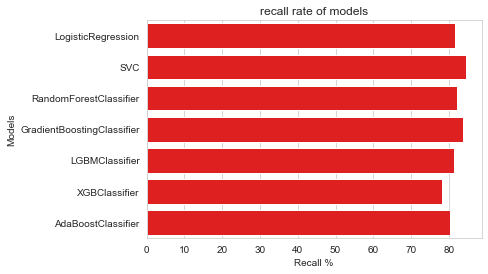

In [69]:
result = []

results = pd.DataFrame(columns= ["Models","Recall"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)    
    result = pd.DataFrame([[name, recall*100]], columns= ["Models","Recall"])
    results = results.append(result)
    
    
sns.barplot(x= 'Recall', y = 'Models', data=results, color="r")
plt.xlabel('Recall %')
plt.title('recall rate of models'); 

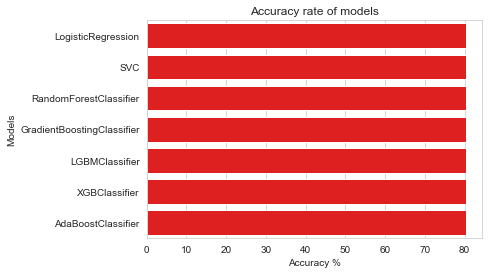

In [70]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[name, recall*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy rate of models'); 

----------------------------
LogisticRegression:


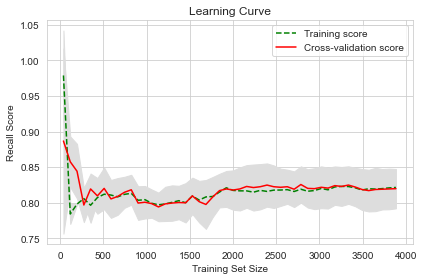

----------------------------
SVC:


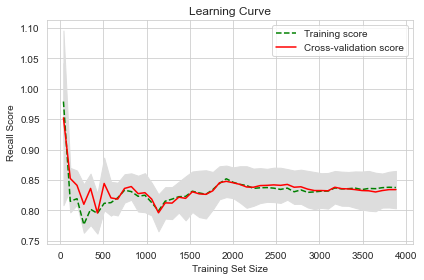

----------------------------
RandomForestClassifier:


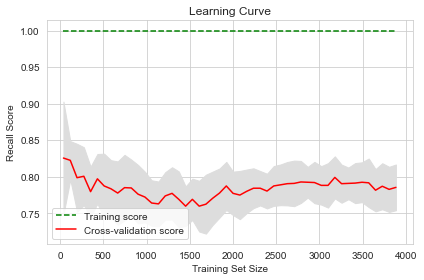

----------------------------
GradientBoostingClassifier:


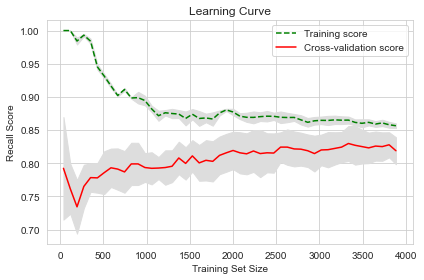

----------------------------
LGBMClassifier:


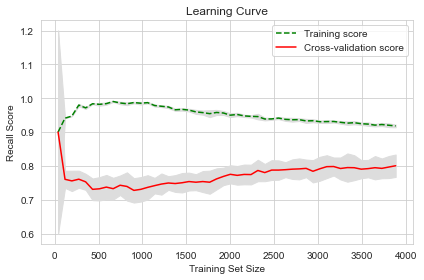

----------------------------
XGBClassifier:


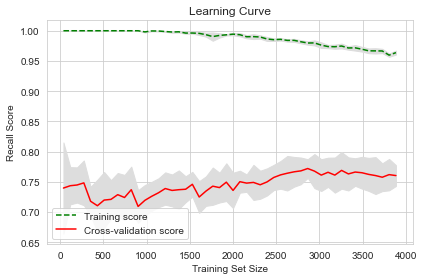

----------------------------
AdaBoostClassifier:


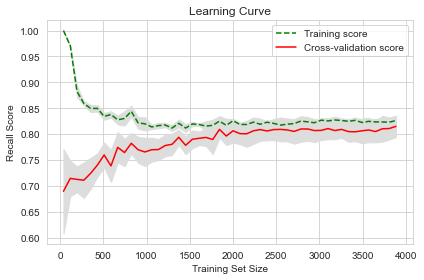

In [71]:
from sklearn.model_selection import learning_curve
#Create CV training and test scores for various training set sizes
for model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                features, target,
                                                # Number of folds in cross-validation
                                                cv=10,
                                                # Evaluation metric
                                                scoring='recall',
                                                # Use all computer cores
                                                n_jobs=-1, 
                                                # 50 different sizes of the training set
                                                train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="green",  label="Training score")
    plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    name = model.__class__.__name__
    print("-"*28)
    print(name + ":" )
    
    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Recall Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


#### Dari 8 Model dipilih 4 model untuk hyperparameter tuning berdasarkan recall, accuracy dan learning curve

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [73]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

##### Model 1 - Logistic Regression

In [74]:
parameters = {'C':[0.003,0.004,0.005,0.006,0.007],
              'solver' : ['newton-cg', 'lbfgs', 'sag']
             }
log = LogisticRegression(penalty='l2', random_state=random_state)
tuned_lr= GridSearchCV(log,parameters, scoring='recall',n_jobs=-1,cv=cv)
tuned_lr.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=LogisticRegression(random_state=101), n_jobs=-1,
             param_grid={'C': [0.003, 0.004, 0.005, 0.006, 0.007],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             scoring='recall')

In [75]:
tuned_lr.best_params_

{'C': 0.003, 'solver': 'sag'}

In [76]:
tuned_lr = LogisticRegression(penalty='l2', random_state=random_state,
                              C=0.003, solver='sag').fit(X_train, y_train)

y_pred = tuned_lr.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = tuned_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 446  866]
 [ 206 1720]]
              precision    recall  f1-score   support

           0       0.68      0.34      0.45      1312
           1       0.67      0.89      0.76      1926

    accuracy                           0.67      3238
   macro avg       0.67      0.62      0.61      3238
weighted avg       0.67      0.67      0.64      3238

----------------------------------------
[[156 282]
 [ 64 578]]
              precision    recall  f1-score   support

           0       0.71      0.36      0.47       438
           1       0.67      0.90      0.77       642

    accuracy                           0.68      1080
   macro avg       0.69      0.63      0.62      1080
weighted avg       0.69      0.68      0.65      1080



##### Model 2 - Support Vector Mechanism

In [77]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
parameters = { 'kernel' : ['linear'],
               'C':[0.00005,0.0005,0.005,0.05],
               'gamma' : [0.1, 0.05, 0.01]
             }
svc_tuned = GridSearchCV(SVC(),parameters, scoring='recall',n_jobs=-1,cv=cv)
svc_tuned.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [5e-05, 0.0005, 0.005, 0.05],
                         'gamma': [0.1, 0.05, 0.01], 'kernel': ['linear']},
             scoring='recall')

In [78]:
svc_tuned.best_params_

{'C': 5e-05, 'gamma': 0.1, 'kernel': 'linear'}

In [79]:
svc_tuned = SVC(C=0.00005, kernel='linear', gamma=0.1, 
                probability=True).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = svc_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 448  864]
 [ 215 1711]]
              precision    recall  f1-score   support

           0       0.68      0.34      0.45      1312
           1       0.66      0.89      0.76      1926

    accuracy                           0.67      3238
   macro avg       0.67      0.61      0.61      3238
weighted avg       0.67      0.67      0.64      3238

----------------------------------------
[[169 269]
 [ 65 577]]
              precision    recall  f1-score   support

           0       0.72      0.39      0.50       438
           1       0.68      0.90      0.78       642

    accuracy                           0.69      1080
   macro avg       0.70      0.64      0.64      1080
weighted avg       0.70      0.69      0.66      1080



##### Model 3 - GradientBoostingClassifier

In [80]:
parameters = {
    'learning_rate' : [0.05, 0.01, 0.5, 0.1],
    'max_depth' : [5,6,7,8],
    'min_samples_split':[20,30,40,50,],
}
gbm_tuned1 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=cv,
                             scoring='recall', n_jobs=-1)
gbm_tuned1.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.01, 0.5, 0.1],
                         'max_depth': [5, 6, 7, 8],
                         'min_samples_split': [20, 30, 40, 50]},
             scoring='recall')

In [81]:
gbm_tuned1.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 50}

In [82]:
gbm_tuned1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, 
            min_samples_split = 50,).fit(X_train, y_train)

y_pred = gbm_tuned1.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = gbm_tuned1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 616  696]
 [ 176 1750]]
              precision    recall  f1-score   support

           0       0.78      0.47      0.59      1312
           1       0.72      0.91      0.80      1926

    accuracy                           0.73      3238
   macro avg       0.75      0.69      0.69      3238
weighted avg       0.74      0.73      0.71      3238

----------------------------------------
[[177 261]
 [ 67 575]]
              precision    recall  f1-score   support

           0       0.73      0.40      0.52       438
           1       0.69      0.90      0.78       642

    accuracy                           0.70      1080
   macro avg       0.71      0.65      0.65      1080
weighted avg       0.70      0.70      0.67      1080



##### Model 4 - Adaboost

In [83]:
parameters = {
    'n_estimators' : [50,100,150,200],
    'learning_rate' : [0.01, 0.05, 0.5, 0.1],
}
ab_tuned = GridSearchCV(AdaBoostClassifier(), parameters, cv=cv,
                             scoring='recall', n_jobs=-1).fit(X_train,y_train)

In [84]:
ab_tuned.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [85]:
ab_tuned = AdaBoostClassifier(learning_rate = 0.01, 
                              n_estimators=100).fit(X_train, y_train)

y_pred = ab_tuned.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = ab_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 410  902]
 [ 156 1770]]
              precision    recall  f1-score   support

           0       0.72      0.31      0.44      1312
           1       0.66      0.92      0.77      1926

    accuracy                           0.67      3238
   macro avg       0.69      0.62      0.60      3238
weighted avg       0.69      0.67      0.63      3238

----------------------------------------
[[135 303]
 [ 52 590]]
              precision    recall  f1-score   support

           0       0.72      0.31      0.43       438
           1       0.66      0.92      0.77       642

    accuracy                           0.67      1080
   macro avg       0.69      0.61      0.60      1080
weighted avg       0.69      0.67      0.63      1080



#### Model Final SVM (Support Vector Mechanism)

In [86]:
svc_tuned = SVC(C=0.00005, kernel='linear', gamma=0.1, 
                probability=True).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('----------------------------------------')
y_pred = svc_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 448  864]
 [ 215 1711]]
              precision    recall  f1-score   support

           0       0.68      0.34      0.45      1312
           1       0.66      0.89      0.76      1926

    accuracy                           0.67      3238
   macro avg       0.67      0.61      0.61      3238
weighted avg       0.67      0.67      0.64      3238

----------------------------------------
[[169 269]
 [ 65 577]]
              precision    recall  f1-score   support

           0       0.72      0.39      0.50       438
           1       0.68      0.90      0.78       642

    accuracy                           0.69      1080
   macro avg       0.70      0.64      0.64      1080
weighted avg       0.70      0.69      0.66      1080



#### Confusion Matrix

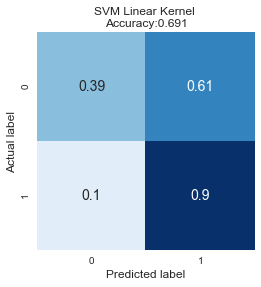

In [87]:
c = confusion_matrix(y_test, y_pred)
# Normalise
normed_c = (c.T / c.astype(np.float).sum(axis=1)).T
sns.heatmap(normed_c, 
            annot=True,
            annot_kws=dict(fontsize=14),
            #fmt='.0f',
            cbar=False,
            cmap=plt.cm.Blues,
            square=True,
            vmin = 0,
            #vmax = 1,
           )
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.xlabel('Predicted label',fontsize=12)
plt.ylabel('Actual label', fontsize=12);

### Features Importance

<AxesSubplot:>

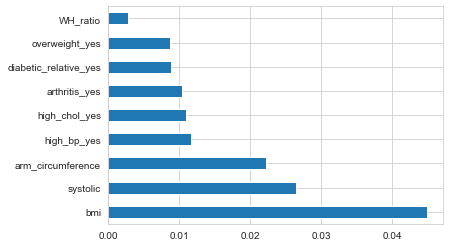

In [88]:
pd.Series(abs(svc_tuned.coef_[0]), index=features.columns).nlargest(10).plot(kind='barh')